# Hamiltonian Monte Carlo

In [38]:
using Random, Distributions, LinearAlgebra, ForwardDiff, Plots, StatsPlots
Random.seed!(123)

MersenneTwister(123)

In [11]:
function π(θ)
    exp(-1/2 *  (prod(θ)^2 + sum(θ.^2) - 8 * sum(θ)) )
end

π (generic function with 1 method)

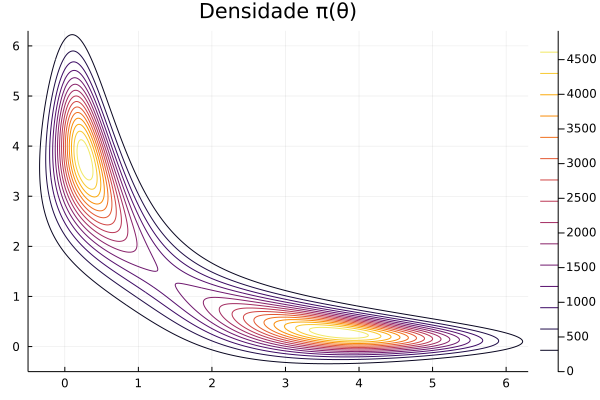

In [59]:
x = -0.5:0.01:6.3;
y = -0.5:0.01:6.3;
contour(x, y, (x,y) -> π((x,y)), title="Densidade π(θ)")

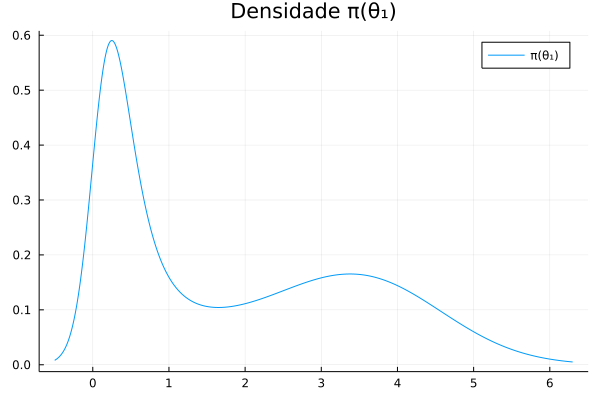

In [88]:
Z = zeros(size(x)[1], size(y)[1])
for (i, u) in enumerate(x)
    for (j, v) in enumerate(y)
        Z[i,j] = π([u,v])
    end
end
plot(x, sum(Z, dims=2) / sum(Z) * 100, title="Densidade π(θ₁)", label="π(θ₁)")

In [21]:
function U(θ)
    -log(π(θ))
end

U (generic function with 1 method)

In [22]:
function dU(U, θ)
    ForwardDiff.gradient(U, θ)
end

dU (generic function with 1 method)

In [23]:
function K(ρ, M)
    1/2 * ρ' * M^-1 * ρ
end

K (generic function with 1 method)

In [24]:
function leapfrog_step(θ, ρ, U, dU, M, L, ϵ)
    ρ = ρ - ϵ/2 * dU(U, θ)
    θ = θ + ϵ * M^-1 * ρ
    ρ = ρ - ϵ/2 * dU(U, θ)
    return(θ, ρ)
end

leapfrog_step (generic function with 1 method)

In [25]:
function metropolis_step(θ, ρ, θₜ, ρₜ, U, K, M)
    r = exp(U(θ) - U(θₜ) + K(ρ, M) - K(ρₜ, M))
    u = rand(Uniform())
    if u < r
        return(θₜ, -ρₜ)
    else
        return(θ, ρ)
    end
end

metropolis_step (generic function with 1 method)

In [26]:
function HMC(θ, U, dU, K, M, L, ϵ, num_iter)
    d = size(θ, 1)
    Θ = zeros(num_iter, d)
    Ρ = zeros(num_iter, d)

    for t = 1:num_iter

        # Amostra ρ
        Σ = cholesky(M).L
        P = MvNormal(Σ)
        ρ = rand(P)

        # Inicializa estado no passo t
        ρₜ = ρ
        θₜ = θ

        # Leapfrog steps
        for l = 1:L
            θₜ, ρₜ = leapfrog_step(θₜ, ρₜ, U, dU, M, L, ϵ)
        end

        # Metropolis step
        θ, ρ = metropolis_step(θ, ρ, θₜ, ρₜ, U, K, M)

        # Registra valores amostrados
        Θ[t,:] = θ
        Ρ[t,:] = ρ

    end
    return((Θ, Ρ))
end

HMC (generic function with 1 method)

## Exemplo 1

$L = 10$

$\epsilon = 0.01$

In [28]:
d = 2
θ₀ = rand(d)
M = I(d)
L = 100
ϵ = 0.01
burn_in = 10000
N = 10000
num_iter = burn_in + N;

In [30]:
A, B = HMC(θ₀, U, dU, K, M, L, ϵ, num_iter);

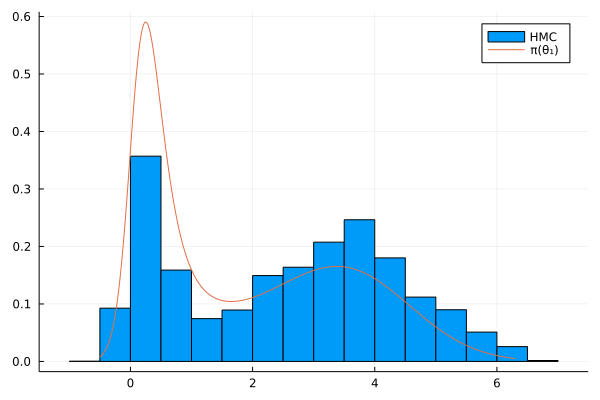

In [95]:
histogram(A[:, 1], normed=true, label="HMC")
plot!(x, sum(Z, dims=2) / sum(Z) * 100, label="π(θ₁)")

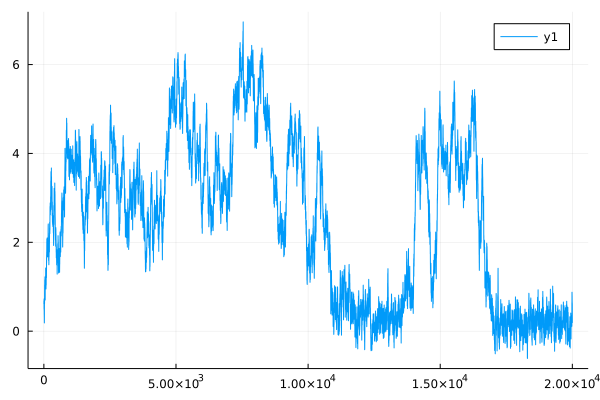

In [96]:
plot(1:num_iter, A[:, 1])

## Exemplo 2

$L = 100$

$\epsilon = 0.001$

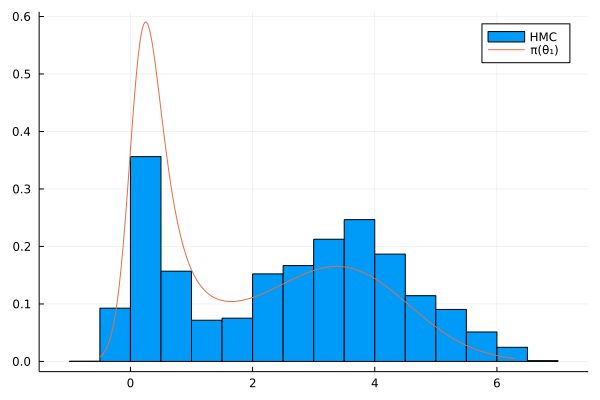

In [98]:
d = 2
θ₀ = rand(d)
M = I(d)
L = 100
ϵ = 0.001
burn_in = 10000
N = 10000
num_iter = burn_in + N;

C, D = HMC(θ₀, U, dU, K, M, L, ϵ, num_iter);

histogram(C[:, 1], normed=true, label="HMC")
plot!(x, sum(Z, dims=2) / sum(Z) * 100, label="π(θ₁)")

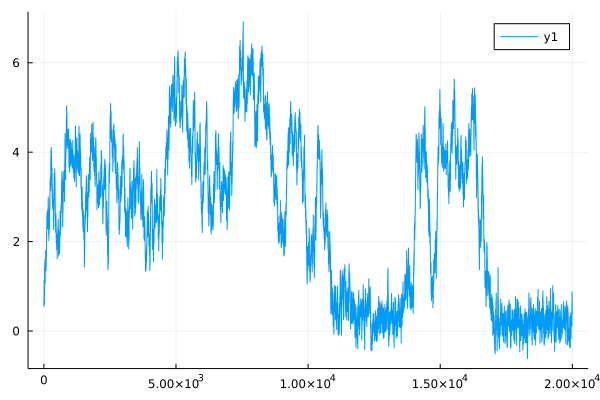

In [99]:
plot(1:num_iter, C[:, 1])

## Exemplo 3

$L = 100$

$\epsilon = 0.01$

In [104]:
d = 2
θ₀ = rand(d)
M = I(d)
L = 150
ϵ = 0.01
burn_in = 10000
N = 10000
num_iter = burn_in + N;

In [105]:
D, E = HMC(θ₀, U, dU, K, M, L, ϵ, num_iter);

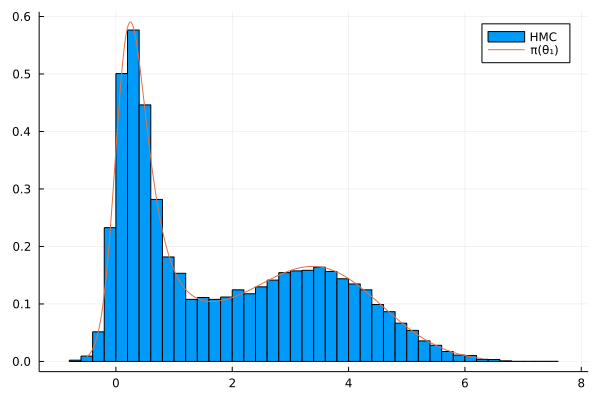

In [106]:
histogram(D[:, 1], normed=true, label="HMC")
plot!(x, sum(Z, dims=2) / sum(Z) * 100, label="π(θ₁)")

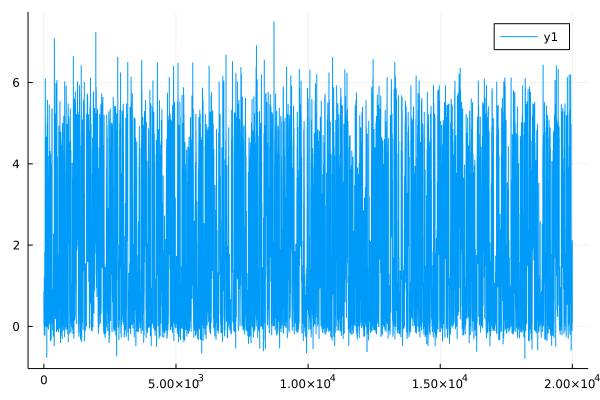

In [112]:
plot(1:num_iter, D[1:num_iter, 1])

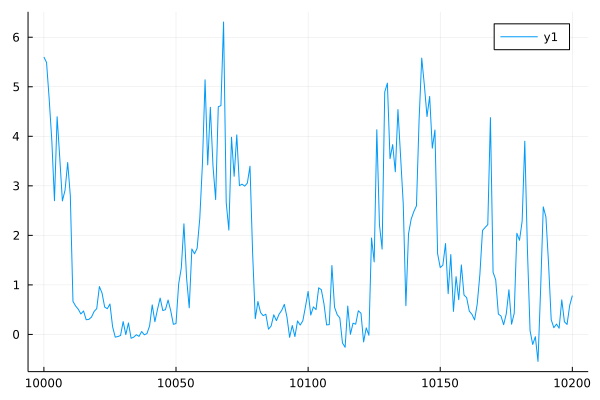

In [116]:
plot(burn_in:burn_in+200, D[burn_in:burn_in+200, 1])